In [2]:
from collections import defaultdict
import awkward as ak
import numba
import numpy as np
import pandas as pd
import h5py
import vector
import coffea
import coffea.util
from math import sqrt
vector.register_numba()
vector.register_awkward()

import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
import mplhep as hep
#hep.style.use(hep.style.ROOT)

ModuleNotFoundError: No module named 'awkward'

In [1]:
# prefix="/run/user/1000/gvfs/sftp:host=lxplus.cern.ch,user=mmalucch/"
# filename_test = prefix+"/eos/home-m/mmalucch/spanet_inputs/output_JetGoodHiggs_test.h5"
# filename_test="/work/mmalucch/out_hh4b/hh4b_btag_in_presel_0pad/output_JetGoodHiggs_test.h5"
# filename_test = prefix+"/eos/home-m/mmalucch/spanet_inputs/zero_padding/output_JetGoodHiggs_test.h5"
# filename_pred = prefix+"/eos/home-r/ramellar/prediction.h5"
# filename_pred = "/home/matteo/Downloads/prediction.h5"
filename_pred="/work/mmalucch/prediction.h5"
filename_test="/work/mmalucch/out_hh4b/hh4b_btag_in_presel_0pad/output_JetGoodHiggs_test.h5"
df_test = h5py.File(filename_test,'r')
df_pred = h5py.File(filename_pred,'r')

NameError: name 'h5py' is not defined

In [ ]:
df_test["INPUTS"]["FifthJet"]["btag"][()]


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
df_pred["TARGETS"]["h1"].keys()

<KeysViewHDF5 ['assignment_probability', 'b1', 'b2', 'detection_probability', 'marginal_probability']>

## Compute the jet assignment efficiency
We extract the predicted and true indices for the individual quarks.
Jets are correctly assigned when the predicted jet index is equal to the true index. We can compute the efficiency as the ratio of the correctly assigned jets over the total number of jets.

In [ ]:
idx_b1_pred = df_pred["TARGETS"]["h1"]["b1"][()]
idx_b2_pred = df_pred["TARGETS"]["h1"]["b2"][()]
idx_b1_pred

array([0, 1, 0, ..., 2, 1, 0])

In [ ]:
idx_b1_true = df_test["TARGETS"]["h1"]["b1"][()]
idx_b2_true = df_test["TARGETS"]["h1"]["b2"][()]
idx_b1_true

array([1, 0, 1, ..., 0, 0, 2])

In [ ]:
idx_h1_pred = ak.concatenate((ak.unflatten(idx_b1_pred, ak.ones_like(idx_b1_pred)), ak.unflatten(idx_b2_pred, ak.ones_like(idx_b2_pred))), axis=1)
idx_h1_true = ak.concatenate((ak.unflatten(idx_b1_true, ak.ones_like(idx_b1_true)), ak.unflatten(idx_b2_true, ak.ones_like(idx_b2_true))), axis=1)
idx_h1_pred

<Array [[0, 2], [1, 2], ... [1, 3], [0, 1]] type='129710 * var * int64'>

In [ ]:
print(idx_h1_pred)
print(idx_h1_true)

[[0, 2], [1, 2], [0, 3], [0, 2], [0, 1], ... [0, 2], [2, 3], [2, 3], [1, 3], [0, 1]]
[[1, 3], [0, 3], [1, 2], [0, 2], [2, 3], ... [1, 3], [2, 3], [0, 1], [0, 2], [2, 3]]


In [ ]:
idx_b3_pred = df_pred["TARGETS"]["h2"]["b3"][()]
idx_b4_pred = df_pred["TARGETS"]["h2"]["b4"][()]
idx_b3_true = df_test["TARGETS"]["h2"]["b3"][()]
idx_b4_true = df_test["TARGETS"]["h2"]["b4"][()]

idx_h2_pred = ak.concatenate((ak.unflatten(idx_b3_pred, ak.ones_like(idx_b3_pred)), ak.unflatten(idx_b4_pred, ak.ones_like(idx_b4_pred))), axis=1)
idx_h2_true = ak.concatenate((ak.unflatten(idx_b3_true, ak.ones_like(idx_b3_true)), ak.unflatten(idx_b4_true, ak.ones_like(idx_b4_true))), axis=1)
print(idx_h2_pred)
print(idx_h2_true)

[[1, 3], [0, 3], [1, 2], [1, 3], [2, 3], ... [1, 3], [0, 1], [0, 1], [0, 2], [2, 3]]
[[0, 2], [1, 2], [0, 3], [1, -1], [0, 1], ... 0, -1], [0, 1], [2, 3], [1, 3], [0, 1]]


In [ ]:
# order the true array in increasing order
idx_h1_true_order = ak.sort(idx_h1_true, axis=1)
idx_h1_true_order = idx_h1_true
print(idx_h1_true)
print(idx_h1_true_order)
print(ak.sum(idx_h1_true[:,0]>idx_h1_true[:,1]))
print(ak.sum(idx_h1_true_order[:,0]>idx_h1_true_order[:,1]))

print(idx_h1_true[idx_h1_true[:,0]>idx_h1_true[:,1]])
print(len(idx_h1_true[idx_h1_true[:,0]>idx_h1_true[:,1]]))

print(idx_h1_true_order)

print(idx_h1_true_order[idx_h1_true_order[:,1]==-1])
print(ak.num(idx_h1_true_order[(idx_h1_true[:,1]==-1) & (idx_h1_true[:,0]!=-1)], axis=0))
print(len(idx_h1_true[(idx_h1_true[:,1]==-1) & (idx_h1_true[:,0]!=-1)]))

idx_h2_true_order=ak.sort(idx_h2_true, axis=1)
idx_h2_true_order = idx_h2_true


[[1, 3], [0, 3], [1, 2], [0, 2], [2, 3], ... [1, 3], [2, 3], [0, 1], [0, 2], [2, 3]]
[[1, 3], [0, 3], [1, 2], [0, 2], [2, 3], ... [1, 3], [2, 3], [0, 1], [0, 2], [2, 3]]
5630
5630
[[0, -1], [0, -1], [0, -1], [0, -1], [2, ... -1], [2, -1], [2, -1], [1, -1], [1, -1]]
5630
[[1, 3], [0, 3], [1, 2], [0, 2], [2, 3], ... [1, 3], [2, 3], [0, 1], [0, 2], [2, 3]]
[[0, -1], [0, -1], [0, -1], [0, -1], [2, ... -1], [2, -1], [2, -1], [1, -1], [1, -1]]
5630
5630


In [ ]:
# concatenate the two arrays for h1 and h2 adding another axis
idx_true = ak.concatenate((ak.unflatten(idx_h1_true_order, ak.ones_like(idx_h1_true_order[:,0])), ak.unflatten(idx_h2_true_order, ak.ones_like(idx_h2_true_order[:,0]))), axis=1)
print(idx_true[2:5])

idx_pred = ak.concatenate((ak.unflatten(idx_h1_pred, ak.ones_like(idx_h1_pred[:,0])), ak.unflatten(idx_h2_pred, ak.ones_like(idx_h2_pred[:,0]))), axis=1)
print(idx_pred[2:5])

# if an event has a -1 in the true array, remove it
mask_fully_matched = ak.all(ak.all(idx_true>=0, axis=-1), axis=-1)
print(mask_fully_matched)

idx_true_fully_matched = idx_true[mask_fully_matched]
idx_pred_fully_matched = idx_pred[mask_fully_matched]
print(idx_true_fully_matched[2:5])
print(idx_pred_fully_matched[2:5])

print(ak.sum(idx_true_fully_matched[idx_true_fully_matched[:,:,0]>idx_true_fully_matched[:,:,1]]))

print(len(idx_true_fully_matched))
print(len(idx_true_fully_matched)/len(idx_true))

# idx_true_fully_matched=ak.to_numpy  (idx_true_fully_matched)
# idx_pred_fully_matched=ak.to_numpy  (idx_pred_fully_matched)


[[[1, 2], [0, 3]], [[0, 2], [1, -1]], [[2, 3], [0, 1]]]
[[[0, 3], [1, 2]], [[0, 2], [1, 3]], [[0, 1], [2, 3]]]
[True, True, True, False, True, True, True, ... True, False, True, True, True, True]
[[[1, 2], [0, 3]], [[2, 3], [0, 1]], [[0, 1], [2, 3]]]
[[[0, 3], [1, 2]], [[0, 1], [2, 3]], [[0, 1], [2, 3]]]
0
116863
0.9009559787217639


In [ ]:
# # CHECK IF THE TWO ARRAYS ARE EQUAL and if you swap the columns
# matched_events =[]
# for i in range(len(idx_true_fully_matched)):
#     arr_true = idx_true_fully_matched[i]
#     arr_pred = idx_pred_fully_matched[i]
#     if ak.all(arr_true[0]==arr_pred[0]) or ak.all(arr_true[0]==arr_pred[1]):
#         matched_events.append(i)

# print(len(matched_events))


In [ ]:
# print("eff: ", len(matched_events)/len(idx_true_fully_matched))

In [ ]:
correctly_fully_matched = (
    ak.all(idx_true_fully_matched[:, 0] == idx_pred_fully_matched[:, 0], axis=1)
    | ak.all(idx_true_fully_matched[:, 0] == idx_pred_fully_matched[:, 1], axis=1)
    # | ak.all(idx_true_fully_matched[:, 1] == idx_pred_fully_matched[:, 0], axis=1)
    # | ak.all(idx_true_fully_matched[:, 1] == idx_pred_fully_matched[:, 1], axis=1)
)
print(ak.sum(correctly_fully_matched) / len(idx_true_fully_matched))

0.984477550636215


In [ ]:
mask_1h = ak.sum(ak.any(idx_true == -1, axis=-1), axis=-1) == 1
print(mask_1h)
print(idx_true)
idx_true_partially_matched_1h = idx_true[mask_1h]
idx_pred_partially_matched_1h = idx_pred[mask_1h]
print(idx_true_partially_matched_1h[2:5])
print(idx_pred_partially_matched_1h[2:5])
print(len(idx_true_partially_matched_1h))
print(len(idx_true_partially_matched_1h) / len(idx_true))

correctly_partially_matched_1h = (
    ak.all(
        idx_true_partially_matched_1h[:, 0] == idx_pred_partially_matched_1h[:, 0],
        axis=1,
    )
    | ak.all(
        idx_true_partially_matched_1h[:, 0] == idx_pred_partially_matched_1h[:, 1],
        axis=1,
    )
    | ak.all(
        idx_true_partially_matched_1h[:, 1] == idx_pred_partially_matched_1h[:, 0],
        axis=1,
    )
    | ak.all(
        idx_true_partially_matched_1h[:, 1] == idx_pred_partially_matched_1h[:, 1],
        axis=1,
    )
)
print(correctly_partially_matched_1h[2:5])
print(ak.sum(correctly_partially_matched_1h) / len(idx_true_partially_matched_1h))

[False, False, False, True, False, False, ... True, False, False, False, False]
[[[1, 3], [0, 2]], [[0, 3], [1, 2]], [[1, ... [[0, 2], [1, 3]], [[2, 3], [0, 1]]]
[[[0, 1], [2, -1]], [[0, 3], [1, -1]], [[0, -1], [2, 3]]]
[[[0, 1], [2, 3]], [[1, 2], [0, 3]], [[1, 2], [0, 3]]]
12279
0.09466502197209159
[True, True, False]
0.8304422184216956


In [ ]:
mask_0h=ak.sum(ak.any(idx_true==-1, axis=-1), axis=-1)==2
print(mask_0h)
print(idx_true)
idx_true_unmatched=idx_true[mask_0h]
idx_pred_unmatched=idx_pred[mask_0h]
print(idx_true_unmatched[2:5])
print(idx_pred_unmatched[2:5])
print(len(idx_true_unmatched))
print(len(idx_true_unmatched)/len(idx_true))


[False, False, False, False, False, False, ... False, False, False, False, False]
[[[1, 3], [0, 2]], [[0, 3], [1, 2]], [[1, ... [[0, 2], [1, 3]], [[2, 3], [0, 1]]]
[[[1, -1], [2, -1]], [[0, -1], [1, -1]], [[1, -1], [0, -1]]]
[[[0, 3], [1, 2]], [[0, 3], [1, 2]], [[0, 2], [1, 3]]]
568
0.004378999306144476


In [ ]:
print(len(idx_true_fully_matched)+len(idx_true_partially_matched_1h)+len(idx_true_unmatched))
print(len(idx_true))

129710
129710


In [ ]:
# summary
frac_fully_matched = len(idx_true_fully_matched) / len(idx_true)
frac_partially_matched_1h = len(idx_true_partially_matched_1h) / len(idx_true)
frac_unmatched = len(idx_true_unmatched) / len(idx_true)
eff_fully_matched = ak.sum(correctly_fully_matched) / len(idx_true_fully_matched)
eff_partially_matched_1h = ak.sum(correctly_partially_matched_1h) / len(idx_true_partially_matched_1h)
eff_unmatched = len(idx_true_unmatched) / len(idx_true)

print(
    f"Fraction of events fully matched: {frac_fully_matched:.3f}\n"
    f"Fraction of events partially matched (1h): {frac_partially_matched_1h:.3f}\n"
    f"Fraction of events unmatched: {frac_unmatched:.3f}\n"
    f"Purity fully matched: {eff_fully_matched:.3f}\n"
    f"Purity partially matched (1h): {eff_partially_matched_1h:.3f}\n"
    f"Purity unmatched: {eff_unmatched:.3f}"
)

Fraction of events fully matched: 0.901
Fraction of events partially matched (1h): 0.095
Fraction of events unmatched: 0.004
Purity fully matched: 0.984
Purity partially matched (1h): 0.830
Purity unmatched: 0.004


# Convert the data to a awkward array

In [ ]:
jet_pt = df_test["INPUTS"]["Jet"]["pt"][()]
jet_ptPNetRegNeutrino = df_pred["INPUTS"]["Jet"]["ptPnetRegNeutrino"][()]
jet_eta = df_test["INPUTS"]["Jet"]["eta"][()]
jet_phi = df_test["INPUTS"]["Jet"]["phi"][()]
jet_mass = df_test["INPUTS"]["Jet"]["mass"][()]
jet_btag = df_test["INPUTS"]["Jet"]["btag"][()]

jet = ak.zip(
    {
        # "pt": jet_pt,
        "pt": jet_ptPNetRegNeutrino,
        "eta": jet_eta,
        "phi": jet_phi,
        "mass": jet_mass,
        "btag": jet_btag,
    },with_name="Momentum4D"
)

print(jet.pt)
print(jet.px)
print(jet)
jet_sum=jet[:, 0]+jet[:, 1]
print(jet_sum.px)
print(jet_sum.mass)

# jet_coffea = coffea.util.awkward_rewrap(jet)
# print(jet_coffea.pt)

print("prueba",jet.pt[0][0][0])

[[46.3, 76.9, 97.1, 144], [62, 155, 115, ... 128, 111, 69.6], [319, 93.5, 364, 107]]
[[0.814, -69.2, 94.1, -121], [-49, 130, ... -100, 59], [-84.4, -36.2, 210, 20.5]]
[[{pt: 46.3, eta: -0.115, phi: -1.55, mass: 6.7, ... mass: 10.2, btag: 0.997}]]
[-68.4, 81.1, -6.67, -381, -61.6, 214, ... 279, -41.3, -93.5, -149, -8.71, -121]
[66.7, 215, 234, 513, 129, 127, 504, 96.1, ... 232, 137, 131, 98.9, 127, 275, 127]


In [ ]:
def distance_func_tot(higgs_pair, k):
    higgs1 = higgs_pair[:,:,0]
    higgs2 = higgs_pair[:,:,1]
    dist = abs(higgs1.mass - higgs2.mass * k) / sqrt(1 + k**2)
    return dist


In [ ]:
def reco_higgs(jet_collection, idx_collection):
    higgs_01 = ak.unflatten(jet_collection[:, idx_collection[0][0][0]] + jet_collection[:, idx_collection[0][0][1]],1)
    higgs_23= ak.unflatten(jet_collection[:, idx_collection[0][1][0]] + jet_collection[:, idx_collection[0][1][1]],1)

    higgs_02 = ak.unflatten(jet_collection[:, idx_collection[1][0][0]] + jet_collection[:, idx_collection[1][0][1]],1)
    higgs_13= ak.unflatten(jet_collection[:, idx_collection[1][1][0]] + jet_collection[:, idx_collection[1][1][1]],1)

    higgs_03 = ak.unflatten(jet_collection[:, idx_collection[2][0][0]] + jet_collection[:, idx_collection[2][0][1]],1)
    higgs_12= ak.unflatten(jet_collection[:, idx_collection[2][1][0]] + jet_collection[:, idx_collection[2][1][1]],1)

    higgs_pair_0 = ak.concatenate([higgs_01, higgs_23], axis=1)
    higgs_pair_1 = ak.concatenate([higgs_02, higgs_13], axis=1)
    higgs_pair_2 = ak.concatenate([higgs_03, higgs_12], axis=1)

    higgs_candidates = ak.concatenate([higgs_pair_0, higgs_pair_1, higgs_pair_2], axis=1)
    higgs_candidates_unflatten = ak.unflatten(higgs_candidates,2, axis=1)


    # order the higgs candidates by pt
    higgs_candidates_unflatten_order_idx = ak.argsort(higgs_candidates_unflatten.pt, axis=2, ascending=False)
    higgs_candidates_unflatten_order = higgs_candidates_unflatten[higgs_candidates_unflatten_order_idx]
    return higgs_candidates_unflatten_order


In [ ]:
comb_idx = [[(0, 1), (2, 3)], [(0, 2), (1, 3)], [(0, 3), (1, 2)]]

higgs_candidates_unflatten_order = reco_higgs(jet, comb_idx)
print(higgs_candidates_unflatten_order.pt[0])

distance = distance_func_tot(
    higgs_candidates_unflatten_order,
    1.04,
)
print(distance[0])

dist_order_idx=ak.argsort(distance, axis=1, ascending=True)
print(dist_order_idx[0])
dist_order=distance[dist_order_idx]
print(dist_order[0])

min_dist= dist_order[:,0]
second_min_dist= dist_order[:,1]

min_idx = ak.where(dist_order[:,1]-dist_order[:,0]>30, dist_order_idx[:,0],-1)
print(min_idx)
print(ak.count(min_idx[min_idx==-1]))
print(ak.count(min_idx[min_idx!=-1]))
print(ak.count(min_idx))

mask_30 = min_idx!=-1



comb_idx_tile= np.tile(comb_idx, (len(min_idx),1,1,1))
comb_idx_tile_mask=comb_idx_tile[mask_30]
min_idx_mask=min_idx[mask_30]
# given the min_idx, select the correct combination corresponding to the index
comb_idx_min = comb_idx_tile_mask[np.arange(len(min_idx_mask)), min_idx_mask]
print(len(comb_idx_min))


run2_idx_fully_matched=ak.Array(comb_idx_min)[mask_fully_matched[mask_30]]
print(len(run2_idx_fully_matched))

[[105, 59.9], [195, 118], [124, 62.8]]
[129, 21.8, 13.7]
[2, 1, 0]
[13.7, 21.8, 129]
[-1, 2, -1, 0, 0, 0, -1, -1, 0, 2, 2, 1, ... -1, -1, -1, 1, -1, -1, -1, -1, 0, -1, 0]
68199
61511
129710
61511
54473


In [ ]:
idx_true_fully_matched_mask=idx_true[mask_30][mask_fully_matched[mask_30]]
print(len(idx_true_fully_matched_mask))

correctly_fully_matched_run2 = (
    ak.all(idx_true_fully_matched_mask[:, 0] == run2_idx_fully_matched[:, 0], axis=1)
    | ak.all(idx_true_fully_matched_mask[:, 0] == run2_idx_fully_matched[:, 1], axis=1)
    | ak.all(idx_true_fully_matched_mask[:, 1] == run2_idx_fully_matched[:, 0], axis=1)
    | ak.all(idx_true_fully_matched_mask[:, 1] == run2_idx_fully_matched[:, 1], axis=1)
)
print(ak.sum(correctly_fully_matched_run2) / len(idx_true_fully_matched_mask))

54473
0.9651019771262828


In [ ]:
idx_pred_fully_matched_mask = idx_pred[mask_30][mask_fully_matched[mask_30]]


correctly_fully_matched_mask = (
    ak.all(idx_true_fully_matched_mask[:, 0] == idx_pred_fully_matched_mask[:, 0], axis=1)
    | ak.all(idx_true_fully_matched_mask[:, 0] == idx_pred_fully_matched_mask[:, 1], axis=1)
    | ak.all(idx_true_fully_matched_mask[:, 1] == idx_pred_fully_matched_mask[:, 0], axis=1)
    | ak.all(idx_true_fully_matched_mask[:, 1] == idx_pred_fully_matched_mask[:, 1], axis=1)
)
print(ak.sum(correctly_fully_matched_mask) / len(idx_true_fully_matched_mask))

0.9937583757090669


In [ ]:
# comb_idx = np.array([[[0, 1], [2, 3]], [[0, 2], [1, 3]], [[0, 3], [1, 2]]])
# comb_idx_tile= np.tile(comb_idx, (len(min_idx),1,1,1))
# # print("comb_idx", comb_idx)
# # print("comb_idx_tile", comb_idx_tile[0])
# # print(comb_idx_tile)

# # comb_idx_tile=ak.from_numpy(comb_idx_tile)
# print("comb_idx_tile", comb_idx_tile[0])
# # check when DeltaD<30 the pairing efficiency
# #create an arrayfor eacg event with the index of the higgs pair taken from the comb_idx
# empty_array = np.ndarray((len(min_idx), 2, 2), dtype=int)
# # print(empty_array)
# higgs_pair_idx_empty=ak.Array(empty_array)
# # print(higgs_pair_idx_empty)
# print( comb_idx_tile[:,0])
# print( comb_idx_tile[:,1])
# min_idx=ak.to_numpy(min_idx)
# print(len(min_idx), len(comb_idx_tile[:,0]))
# # reshape the min_idx (dim=n_events) to the same shape of the comb_idx_tile (dim=n_events, 3,2, 2)
# min_idx_tile=np.tile(min_idx, (3,2,1,1))
# print(min_idx_tile[0])
# higgs_pair_idx=np.where(min_idx==0, comb_idx_tile[:,0],comb_idx_tile[:,1])# ak.where(min_idx==1, comb_idx[1], ak.where(min_idx==2, comb_idx[2], -1)))

# Reconstruct the Higgs boson candidates with the four-vectors of the jets considering the true pairings, the spanet pairings and the run2 pairings.

In [ ]:
print(idx_true_fully_matched_mask[:3])
print(idx_pred_fully_matched_mask[:3])
print(run2_idx_fully_matched[:3])
jet_fully_matched_mask=jet[mask_30][mask_fully_matched[mask_30]]
jet_fully_matched=jet[mask_fully_matched]
print(jet_fully_matched_mask[:3].px)
# print(len(jet))
# print(len(jet_fully_matched_mask))
# print(len(idx_true_fully_matched_mask))
# print(len(idx_pred_fully_matched_mask))
# print(len(run2_idx_fully_matched))


[[[0, 3], [1, 2]], [[2, 3], [0, 1]], [[0, 1], [2, 3]]]
[[[1, 2], [0, 3]], [[0, 1], [2, 3]], [[0, 1], [2, 3]]]
[[[0, 3], [1, 2]], [[0, 1], [2, 3]], [[0, 1], [2, 3]]]
[[-49, 130, 106, -230], [18.8, -80.4, -53.7, 86.7], [181, 32.9, -172, -26.7]]


In [ ]:
def best_reco_higgs(jet_collection, idx_collection):
    higgs_1 = ak.unflatten(jet_collection[np.arange(len(idx_collection)), idx_collection[:,0,0]] + jet_collection[np.arange(len(idx_collection)), idx_collection[:,0,1]],1)
    higgs_2= ak.unflatten(jet_collection[np.arange(len(idx_collection)), idx_collection[:,1,0]] + jet_collection[np.arange(len(idx_collection)), idx_collection[:,1,1]],1)

    higgs_pair = ak.concatenate([higgs_1, higgs_2], axis=1)

    # higgs_pair_unflatten = ak.unflatten(higgs_pair,2, axis=1)


    # order the higgs candidates by pt
    higgs_candidates_unflatten_order_idx = ak.argsort(higgs_pair.pt, axis=1, ascending=False)
    higgs_candidates_unflatten_order = higgs_pair[higgs_candidates_unflatten_order_idx]
    return higgs_candidates_unflatten_order


In [ ]:
true_higgs_fully_matched_mask = best_reco_higgs(jet_fully_matched_mask, idx_true_fully_matched_mask)
true_higgs_fully_matched = best_reco_higgs(jet_fully_matched, idx_true_fully_matched)
print(true_higgs_fully_matched_mask[:3].px)
pred_higgs_fully_matched_mask = best_reco_higgs(jet_fully_matched_mask, idx_pred_fully_matched_mask)
print(pred_higgs_fully_matched_mask[:3].px)
run2_higgs_fully_matched = best_reco_higgs(jet_fully_matched_mask, run2_idx_fully_matched)
print(run2_higgs_fully_matched[:3].px)

[[-279, 236], [-61.6, 33], [214, -199]]
[[-279, 236], [-61.6, 33], [214, -199]]
[[-279, 236], [-61.6, 33], [214, -199]]


In [ ]:
def plot_histos(bins, true, run2, spanet, num):
    fig, (ax, ax_residuals) = plt.subplots(
        figsize=(8, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": [3, 1]}
    )
    plt.xlabel(f"Higgs{num}Mass [GeV]")
    ax.hist(
        true,
        bins,
        label=f"True Higgs{num}Mass",
        color="black",
        histtype="step",
        linewidth=2,
        # density=True,
    )
    ax.hist(
        run2,
        bins,
        label=f"Run2 RecoHiggs{num}Mass",
        color="red",
        histtype="step",
        linewidth=2,
        # density=True,
    )
    ax.hist(
        spanet,
        bins,
        label=f"SPANet RecoHiggs{num}Mass",
        color="green",
        histtype="step",
        linewidth=2,
        # density=True,
    )
    true_hist = np.histogram(true, bins)
    run2_hist = np.histogram(run2, bins)
    spanet_hist = np.histogram(spanet, bins)
    print(true_hist)
    # plot error bars
    # ax.errorbar(
    #     0.5 * (bins[1:] + bins[:-1]),
    #     true_hist[0],
    #     yerr=np.sqrt(true_hist[0]),
    #     fmt="none",
    #     color="blue",
    # )
    # ax.errorbar(
    #     0.5 * (bins[1:] + bins[:-1]),
    #     run2_hist[0],
    #     yerr=np.sqrt(run2_hist[0]),
    #     fmt="none",
    #     color="red",
    # )
    # ax.errorbar(
    #     0.5 * (bins[1:] + bins[:-1]),
    #     spanet_hist[0],
    #     yerr=np.sqrt(spanet_hist[0]),
    #     fmt="none",
    #     color="green",
    # )

    # plot the residuals respect to true
    residuals_run2 = (run2_hist[0]) / true_hist[0]
    residuals_spanet = (spanet_hist[0]) / true_hist[0]
    residual_run2_err = np.sqrt(run2_hist[0]) / true_hist[0]
    residual_spanet_err = np.sqrt(spanet_hist[0]) / true_hist[0]
    ax_residuals.errorbar(
        true_hist[1][:-1],
        residuals_run2,
        yerr=residual_run2_err,
        marker=".",
        color="red",
        label="Run2 RecoHiggs",
        fmt="none",
    )
    ax_residuals.errorbar(
        true_hist[1][:-1],
        residuals_spanet,
        yerr=residual_spanet_err,
        marker=".",
        color="green",
        label="SPANet RecoHiggs",
        fmt="none",
    )
    # plot zero line
    ax_residuals.axhline(1, color="black", linewidth=1)

    ax_residuals.grid()

    ax.legend(loc="upper right")

    hep.cms.label(
        year="2022",
        com="13.6",
        label=f"Private Work",
        ax=ax,
    )
    plt.show()

(array([  13,   17,   13,   14,   24,   22,   19,   34,   23,   38,   25,
         54,   51,   60,   56,   78,   98,   91,  136,  150,  171,  227,
        253,  306,  393,  459,  566,  669,  813,  910, 1172, 1341, 1519,
       1751, 2069, 2422, 2653, 2893, 3345, 3492, 3490, 3511, 3324, 2986,
       2526, 2125, 1780, 1368, 1057,  802,  565,  405,  311,  218,  188,
        158,  124,   83,   74,   63,   51,   46,   44,   30,   28,   37,
         39,   34,   27,   19,   12,   27,   16,   22,   12,   18,   14,
         20,   10]), array([ 50.        ,  51.89873418,  53.79746835,  55.69620253,
        57.59493671,  59.49367089,  61.39240506,  63.29113924,
        65.18987342,  67.08860759,  68.98734177,  70.88607595,
        72.78481013,  74.6835443 ,  76.58227848,  78.48101266,
        80.37974684,  82.27848101,  84.17721519,  86.07594937,
        87.97468354,  89.87341772,  91.7721519 ,  93.67088608,
        95.56962025,  97.46835443,  99.36708861, 101.26582278,
       103.16455696, 105.0

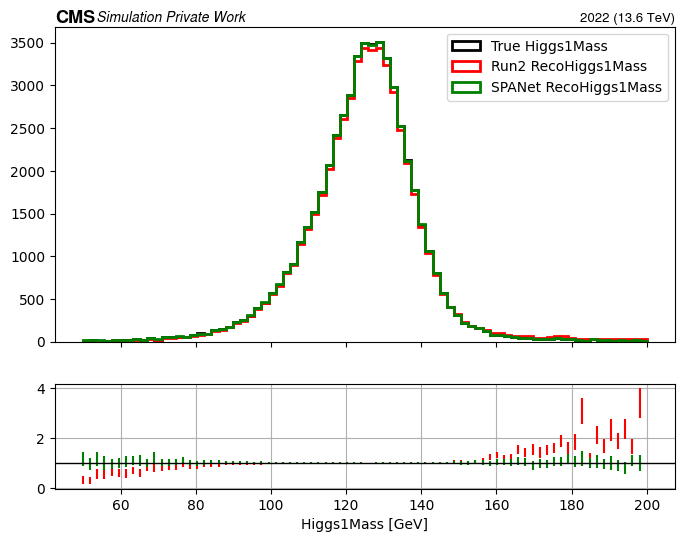

(array([  63,   47,   70,   65,   76,   85,   75,   94,   95,  120,  132,
        135,  150,  177,  212,  250,  263,  346,  368,  440,  483,  568,
        717,  814,  873, 1040, 1237, 1350, 1554, 1724, 1866, 2116, 2358,
       2338, 2580, 2742, 2909, 2871, 2823, 2712, 2522, 2288, 1985, 1633,
       1371, 1116,  811,  610,  441,  355,  233,  203,  170,  112,  106,
         85,   86,   78,   53,   59,   43,   42,   53,   43,   34,   36,
         36,   26,   26,   37,   26,   26,   14,   21,   18,   17,   26,
         24,   19]), array([ 50.        ,  51.89873418,  53.79746835,  55.69620253,
        57.59493671,  59.49367089,  61.39240506,  63.29113924,
        65.18987342,  67.08860759,  68.98734177,  70.88607595,
        72.78481013,  74.6835443 ,  76.58227848,  78.48101266,
        80.37974684,  82.27848101,  84.17721519,  86.07594937,
        87.97468354,  89.87341772,  91.7721519 ,  93.67088608,
        95.56962025,  97.46835443,  99.36708861, 101.26582278,
       103.16455696, 105.0

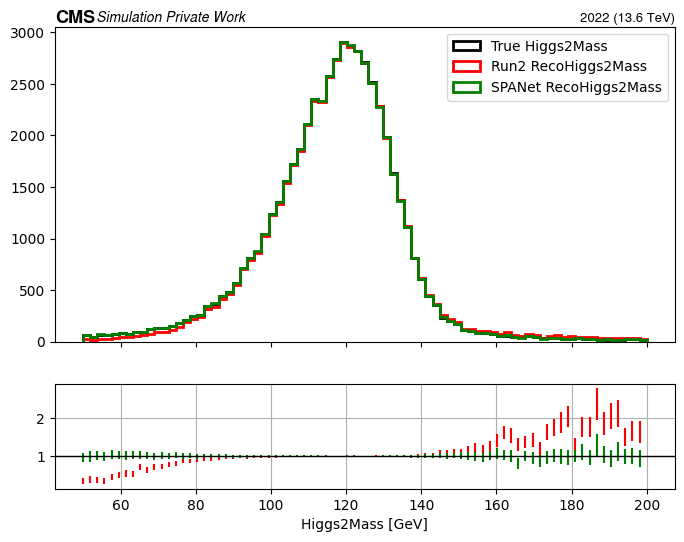

In [ ]:
# for each event plot the mass of the higgs1 and higgs2
bins = np.linspace(50, 200, 80)
plot_histos(bins, true_higgs_fully_matched_mask[:,0].mass, run2_higgs_fully_matched[:,0].mass, pred_higgs_fully_matched_mask[:,0].mass, 1)
plot_histos(bins, true_higgs_fully_matched_mask[:,1].mass, run2_higgs_fully_matched[:,1].mass, pred_higgs_fully_matched_mask[:,1].mass, 2)


Create the system of the two Higgs bosons and compute the invariant mass of the Higgs boson candidates according to the true pairings.

(array([ 133., 1337., 4454., 7158., 7613., 7067., 5993., 4748., 3850.]),
 array([250., 300., 350., 400., 450., 500., 550., 600., 650., 700.]),
 [<matplotlib.patches.Polygon at 0x7fc7396e0b80>])

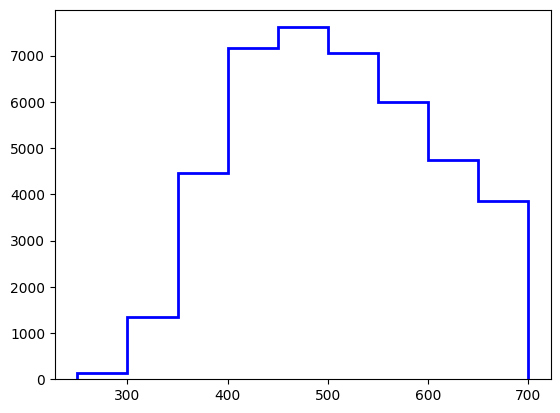

In [ ]:
true_hh_fully_matched_mask=true_higgs_fully_matched_mask[:,0]+true_higgs_fully_matched_mask[:,1]
bins=np.linspace(250,700,10)
# bins=np.array([250, 300, 350, 400,700])

plt.hist(true_hh_fully_matched_mask.mass, bins, label="True HH mass", color="blue", histtype="step", linewidth=2)

compute the differential efficiency as a function of the invariant mass of the Higgs boson candidates.

<ErrorbarContainer object of 3 artists>

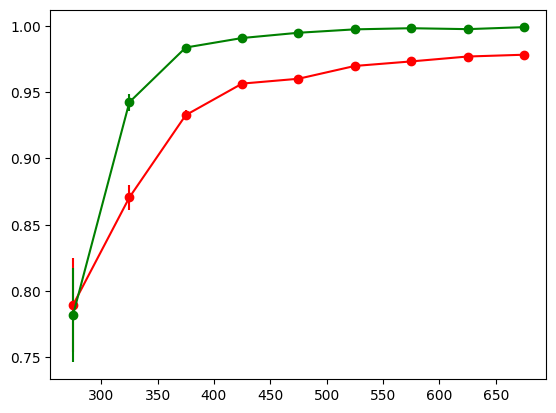

In [ ]:
diff_eff_run2=[]
diff_eff_spanet=[]
unc_eff_spanet_list=[]
unc_eff_run2_list=[]


for i in range(1, len(bins)):
    mask= (true_hh_fully_matched_mask.mass>bins[i-1]) & (true_hh_fully_matched_mask.mass<bins[i])
    eff_run2=ak.sum(correctly_fully_matched_run2[mask])/ak.count(correctly_fully_matched_run2[mask])
    eff_spanet=ak.sum(correctly_fully_matched_mask[mask])/ak.count(correctly_fully_matched_mask[mask])
    unc_eff_run2=sqrt(eff_run2*(1-eff_run2)/ak.count(correctly_fully_matched_run2[mask]))
    unc_eff_spanet=sqrt(eff_spanet*(1-eff_spanet)/ak.count(correctly_fully_matched_mask[mask]))
    diff_eff_run2.append(eff_run2)
    diff_eff_spanet.append(eff_spanet)
    unc_eff_spanet_list.append(unc_eff_spanet)
    unc_eff_run2_list.append(unc_eff_run2)

plt.errorbar(0.5*(bins[1:]+bins[:-1]), diff_eff_run2, yerr=unc_eff_run2_list, label="Run2 RecoHiggs", color="red", marker="o")
plt.errorbar(0.5*(bins[1:]+bins[:-1]), diff_eff_spanet,     yerr=unc_eff_spanet_list, label="SPANet RecoHiggs", color="green", marker="o")

(array([ 1029.,  6845., 15694., 19291., 17591., 14159., 11027.,  8078.,
         6114.]),
 array([250., 300., 350., 400., 450., 500., 550., 600., 650., 700.]),
 [<matplotlib.patches.Polygon at 0x7fc7520d3700>])

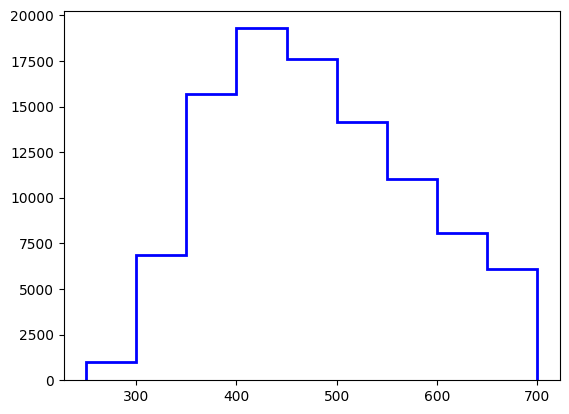

In [ ]:
true_hh_fully_matched=true_higgs_fully_matched[:,0]+true_higgs_fully_matched[:,1]
bins=np.linspace(250,700,10)
# bins=np.array([250, 300, 350, 400,700])
plt.hist(true_hh_fully_matched.mass, bins, label="True HH mass", color="blue", histtype="step", linewidth=2)

[0.01393523330963168, 0.003557967545838188, 0.0013731034636167586, 0.0007292849060628058, 0.0005525802960472869, 0.000386427003507686, 0.00040519438568511183, 0.000494681438464173, 0.00043248876338742854]
[0.7240038872691934, 0.9041636230825421, 0.9694787817000128, 0.9896324711005132, 0.9945995111136376, 0.99788120629988, 0.9981862700643874, 0.9980193117108195, 0.9988550866862937]


<ErrorbarContainer object of 3 artists>

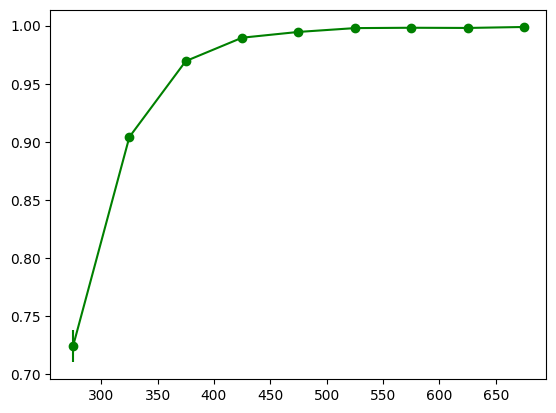

In [ ]:
diff_eff_run2=[]
diff_eff_spanet=[]
unc_eff_spanet_list=[]

for i in range(1, len(bins)):
    mask= (true_hh_fully_matched.mass>bins[i-1]) & (true_hh_fully_matched.mass<bins[i])
    # eff_run2=ak.sum(correctly_fully_matched_run2[mask])/ak.count(correctly_fully_matched_run2[mask])
    eff_spanet=ak.sum(correctly_fully_matched[mask])/ak.count(correctly_fully_matched[mask])
    unc_eff_spanet= sqrt(eff_spanet*(1-eff_spanet)/ak.count(correctly_fully_matched[mask]))
    diff_eff_run2.append(eff_run2)
    diff_eff_spanet.append(eff_spanet)
    unc_eff_spanet_list.append(unc_eff_spanet)

print(unc_eff_spanet_list)
print(diff_eff_spanet)

# plt.plot(0.5*(bins[1:]+bins[:-1]), diff_eff_run2, label="Run2 RecoHiggs", color="red", marker="o")
plt.errorbar(0.5*(bins[1:]+bins[:-1]), diff_eff_spanet, yerr=unc_eff_spanet_list, label="SPANet RecoHiggs", color="green", marker="o")


(array([   5,    9,    4,   10,   12,   16,   10,   24,   19,   27,   21,
         38,   38,   45,   37,   54,   62,   65,   92,  105,  123,  158,
        160,  190,  270,  311,  397,  446,  542,  593,  823,  946, 1047,
       1198, 1477, 1739, 1874, 2051, 2272, 2381, 2389, 2324, 2161, 1908,
       1617, 1316, 1124,  869,  626,  486,  360,  251,  192,  147,  117,
         99,   77,   52,   44,   38,   34,   31,   26,   15,   20,   25,
         28,   23,   22,    9,    6,   17,   10,   17,    8,   15,    5,
         11,    8]), array([ 50.        ,  51.89873418,  53.79746835,  55.69620253,
        57.59493671,  59.49367089,  61.39240506,  63.29113924,
        65.18987342,  67.08860759,  68.98734177,  70.88607595,
        72.78481013,  74.6835443 ,  76.58227848,  78.48101266,
        80.37974684,  82.27848101,  84.17721519,  86.07594937,
        87.97468354,  89.87341772,  91.7721519 ,  93.67088608,
        95.56962025,  97.46835443,  99.36708861, 101.26582278,
       103.16455696, 105.0

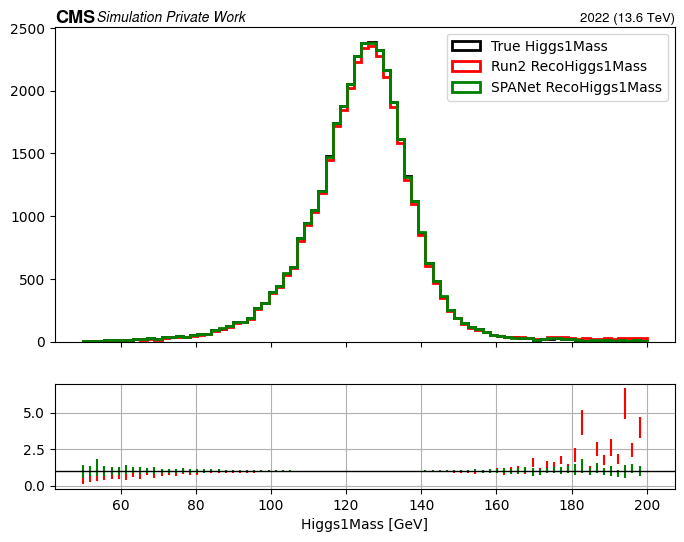

(array([  40,   25,   45,   46,   56,   58,   52,   65,   71,   77,   82,
         87,  104,  125,  153,  175,  197,  248,  258,  274,  347,  388,
        498,  576,  594,  731,  879,  917, 1089, 1186, 1319, 1491, 1637,
       1627, 1786, 1925, 1988, 1913, 1877, 1775, 1597, 1433, 1247, 1000,
        855,  668,  496,  380,  272,  237,  156,  122,  104,   73,   72,
         52,   60,   44,   35,   29,   31,   30,   31,   27,   23,   22,
         22,   20,   18,   23,   17,   12,    8,   13,   12,   12,   17,
         17,    9]), array([ 50.        ,  51.89873418,  53.79746835,  55.69620253,
        57.59493671,  59.49367089,  61.39240506,  63.29113924,
        65.18987342,  67.08860759,  68.98734177,  70.88607595,
        72.78481013,  74.6835443 ,  76.58227848,  78.48101266,
        80.37974684,  82.27848101,  84.17721519,  86.07594937,
        87.97468354,  89.87341772,  91.7721519 ,  93.67088608,
        95.56962025,  97.46835443,  99.36708861, 101.26582278,
       103.16455696, 105.0

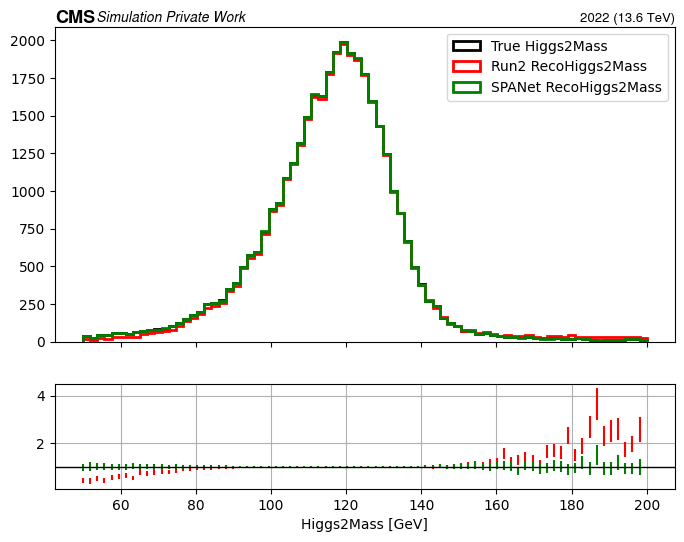

In [ ]:
bins = np.linspace(50, 200, 80)

mask_hh_mass_400 = (true_hh_fully_matched_mask.mass>400) & (true_hh_fully_matched_mask.mass<700)
plot_histos(bins, true_higgs_fully_matched_mask[mask_hh_mass_400][:,0].mass, run2_higgs_fully_matched[mask_hh_mass_400][:,0].mass, pred_higgs_fully_matched_mask[mask_hh_mass_400][:,0].mass, 1)
plot_histos(bins, true_higgs_fully_matched_mask[mask_hh_mass_400][:,1].mass, run2_higgs_fully_matched[mask_hh_mass_400][:,1].mass, pred_higgs_fully_matched_mask[mask_hh_mass_400][:,1].mass, 2)


(array([   8,    8,    9,    4,   12,    6,    9,   10,    4,   11,    4,
         16,   13,   15,   19,   24,   36,   26,   44,   45,   48,   69,
         93,  116,  123,  148,  169,  223,  271,  317,  349,  395,  472,
        553,  592,  683,  779,  842, 1073, 1111, 1101, 1187, 1163, 1078,
        909,  809,  656,  499,  431,  316,  205,  154,  119,   71,   71,
         59,   47,   31,   30,   25,   17,   15,   18,   15,    8,   12,
         11,   11,    5,   10,    6,   10,    6,    5,    4,    3,    9,
          9,    2]), array([ 50.        ,  51.89873418,  53.79746835,  55.69620253,
        57.59493671,  59.49367089,  61.39240506,  63.29113924,
        65.18987342,  67.08860759,  68.98734177,  70.88607595,
        72.78481013,  74.6835443 ,  76.58227848,  78.48101266,
        80.37974684,  82.27848101,  84.17721519,  86.07594937,
        87.97468354,  89.87341772,  91.7721519 ,  93.67088608,
        95.56962025,  97.46835443,  99.36708861, 101.26582278,
       103.16455696, 105.0

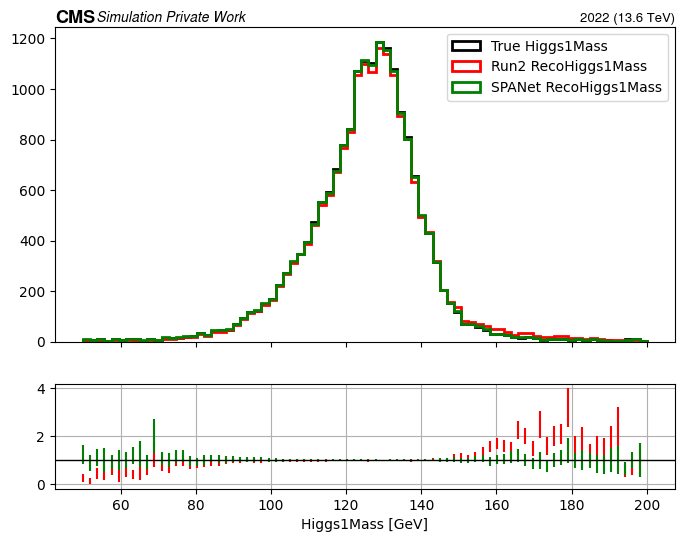

(array([ 23,  22,  25,  19,  20,  27,  23,  29,  24,  43,  50,  48,  46,
        52,  59,  75,  66,  98, 110, 166, 136, 180, 219, 238, 279, 309,
       358, 433, 465, 538, 547, 625, 721, 711, 794, 817, 921, 958, 946,
       937, 925, 855, 738, 633, 516, 448, 315, 230, 169, 118,  77,  81,
        66,  39,  34,  33,  26,  34,  18,  30,  12,  12,  22,  16,  11,
        14,  14,   6,   8,  14,   9,  14,   6,   8,   6,   5,   9,   7,
        10]), array([ 50.        ,  51.89873418,  53.79746835,  55.69620253,
        57.59493671,  59.49367089,  61.39240506,  63.29113924,
        65.18987342,  67.08860759,  68.98734177,  70.88607595,
        72.78481013,  74.6835443 ,  76.58227848,  78.48101266,
        80.37974684,  82.27848101,  84.17721519,  86.07594937,
        87.97468354,  89.87341772,  91.7721519 ,  93.67088608,
        95.56962025,  97.46835443,  99.36708861, 101.26582278,
       103.16455696, 105.06329114, 106.96202532, 108.86075949,
       110.75949367, 112.65822785, 114.55696203, 

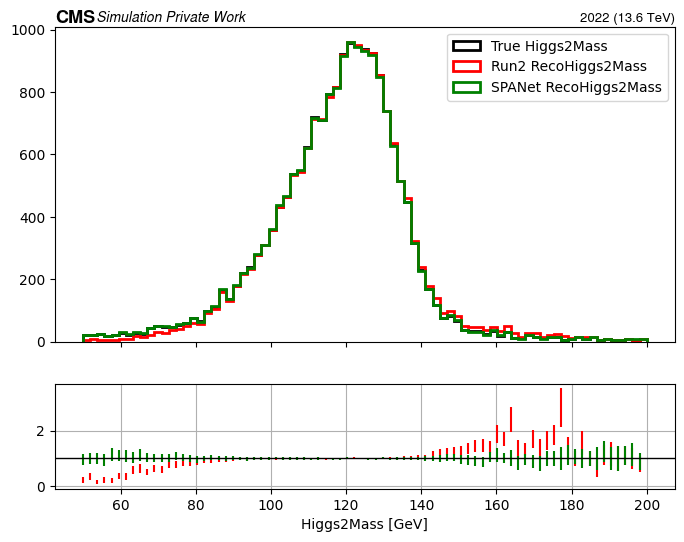

In [ ]:
plot_histos(bins, true_higgs_fully_matched_mask[~mask_hh_mass_400][:,0].mass, run2_higgs_fully_matched[~mask_hh_mass_400][:,0].mass, pred_higgs_fully_matched_mask[~mask_hh_mass_400][:,0].mass, 1)
plot_histos(bins, true_higgs_fully_matched_mask[~mask_hh_mass_400][:,1].mass, run2_higgs_fully_matched[~mask_hh_mass_400][:,1].mass, pred_higgs_fully_matched_mask[~mask_hh_mass_400][:,1].mass, 2)
